In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns

# Breast cancer data
from sklearn.datasets import load_breast_cancer

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target
print(np.unique(y))
print(X.shape)

# Visualize with dataframe
df = pd.DataFrame(data=X, columns=dataObj.feature_names)
df.insert(loc=0, column="class", value=y)
df["class"] = df["class"].map({0: dataObj.target_names[0], 1: dataObj.target_names[1]})
display(df)

[0 1]
(569, 30)


,class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
# Class distribution
df["class"].value_counts()

class
benign       357
malignant    212
Name: count, dtype: int64

In [15]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=1
)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Classfier
svc = SVC(random_state=1)

In [16]:
from sklearn.metrics import confusion_matrix

# Training
svc.fit(X_train_std, y_train)

# Prediction from test data
y_pred = svc.predict(X_test_std)

In [17]:
# Confusion matrix (works but very ugly)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1])
print(confmat)

[[40  2]
 [ 0 72]]


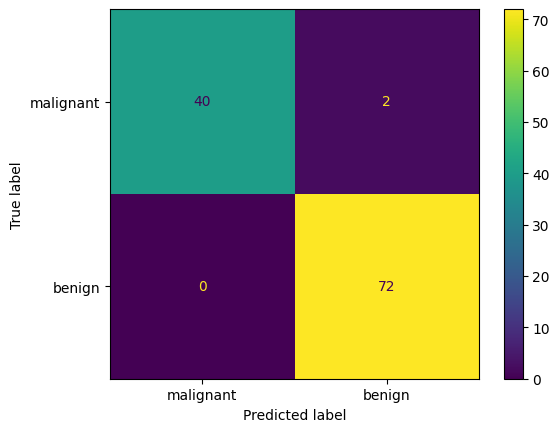

In [18]:
# Confusion matrix (more beautiful)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=svc,
    X=X_test_std,
    y=y_test,
    labels=[0, 1],
    display_labels=["malignant", "benign"],
)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)

datas = []

# Label 0
PRE = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
REC = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
F1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)
datas.append([PRE, REC, F1])

# Label 1 (Default)
PRE = precision_score(y_true=y_test, y_pred=y_pred)
REC = recall_score(y_true=y_test, y_pred=y_pred)
F1 = f1_score(y_true=y_test, y_pred=y_pred)
datas.append([PRE, REC, F1])

In [30]:
df = pd.DataFrame.from_records(
    datas, columns=["Precision", "Recall", "F1"], index=["L0", "L1"]
)
df.index.name = "Label"
display(df)

print(f"Accuracy: {ACC:6.5f}")

,Precision,Recall,F1
Label,,,
L0,1.000000,0.952381,0.975610
L1,0.972973,1.000000,0.986301


Accuracy: 0.98246


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.95238   0.97561        42
           1    0.97297   1.00000   0.98630        72

    accuracy                        0.98246       114
   macro avg    0.98649   0.97619   0.98096       114
weighted avg    0.98293   0.98246   0.98236       114



In [33]:
1.00000 * (42 / 114) + 0.97297 * (72 / 114)

0.9829284210526315